In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

from JUSUFlike.Project.Codes.processing_results import *
from IPython.display import Image
import tvb_model_reference.src.nuu_tools_simulation_human as tools
from sklearn.cluster import KMeans
from scipy import signal

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

fig_labels = ['$S$', '$b_e$ (pA)', '$E_{L,i}$ (mV)', '$E_{L,e}$ (mV)', '$T$ (ms)']

c:\users\david\appdata\local\programs\python\python38\lib\site-packages\tvb\datatypes\surfaces.py:64: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [24]:
from tvb_model_reference.simulation_file.parameter.parameter_M_Berlin import Parameter
parameters = Parameter()
file_name = 'C:/Users/David/Desktop/BOLD/'
parameters.parameter_simulation['path_result'] = file_name
simulator = tools.init(parameters.parameter_simulation, parameters.parameter_model,
                       parameters.parameter_connection_between_region,
                       parameters.parameter_coupling,
                       parameters.parameter_integrator,
                       parameters.parameter_monitor)

weights_mat = np.array(simulator.connectivity.weights)
print(weights_mat.shape)

(68, 68)


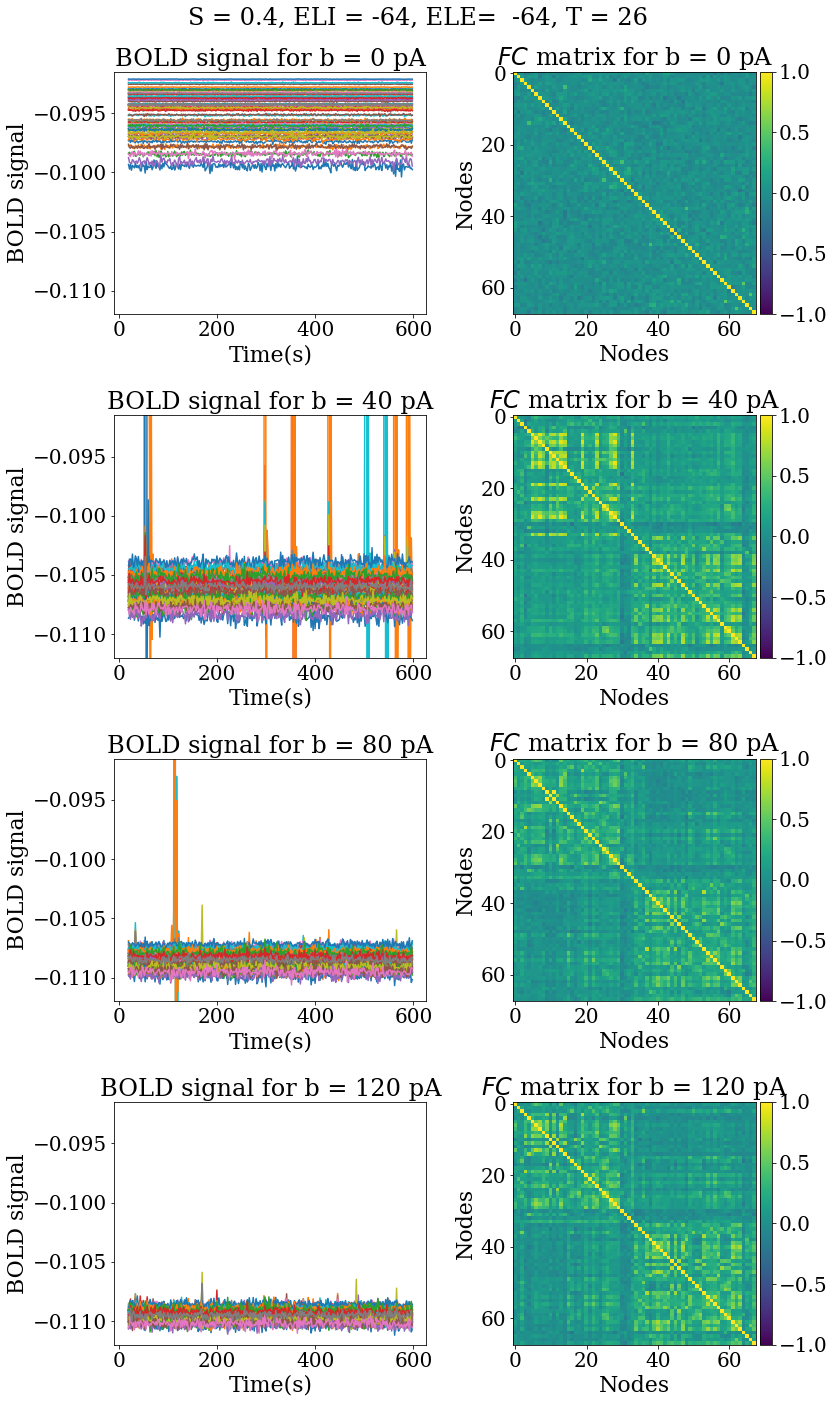

In [47]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
run_sim = 600000.0
cut_transient = 20000.0

folder_root = '/media/master/Nuevo vol/Internship/Data/BOLD/'
folder_root = 'C:/Users/David/Desktop/BOLD/'
file_name_nob = '_a_0.4_ELI_-64_ELE_-64_T_26_b_'
suptitle = 'S = 0.4, ELI = -64, ELE=  -64, T = 26'
bs = [0, 40, 80, 120]
corrcoeff = np.zeros(4)
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle(suptitle)
for ii, b in enumerate(bs):
    ax = axes[ii, 0]
    
    file_name = folder_root + file_name_nob + str(b)
    # Get the matrices first and then fill them up. Menuda mierda que no vaya esto
    times = np.arange(0, run_sim, 2000)
    BOLD = np.zeros((68, times.size))
    for step, time in enumerate(times):
        result = np.load(file_name + f'/step_{step}.npy', allow_pickle=True)[0][0]
        BOLD[:, step] = result[1][0, :, 0]
    # Now cut transient
    times = times[10:] / 1000
    BOLD = BOLD[:, 10:]
    ax.plot(times, BOLD.T)
    ax.set_ylim((-0.112, -0.0915))
    ax.set(xlabel='Time(s)', ylabel='BOLD signal', title=f'BOLD signal for b = {b} pA')
    
    ax = axes[ii, 1]
    FC = np.corrcoef(BOLD)
    corrcoeff[ii] = np.corrcoef(x=FC.flatten(), y=weights_mat.flatten())[0, 1]
    im = ax.imshow(FC, vmin=-1, vmax=1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set(title=f'$FC$ matrix for b = {b} pA', xlabel='Nodes', ylabel='Nodes')

plt.tight_layout()
plt.show()

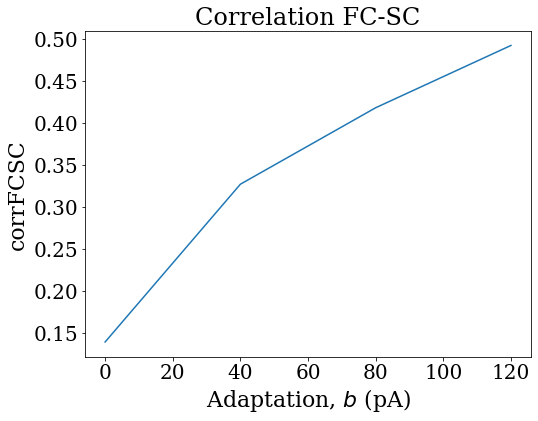

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(bs, corrcoeff)
ax.set(title='Correlation FC-SC', xlabel='Adaptation, $b$ (pA)', ylabel='corrFCSC')
plt.show()